<a href="https://colab.research.google.com/github/yasmine-mk/Polynomial-Regression/blob/main/Position_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression with Feature Engineering applied to Position_Salaries dataset

# key idea 
allowing a Linear Regression model to fit nonlinear Data structures using feature Engineering 

In [34]:
#importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math, copy

In [ ]:
df = pd.read_csv("Position_Salaries.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [56]:
x = df.iloc[:,1]
y = df.iloc[:,-1]

In [47]:
#add engineered feature
x_test = np.c_[x,x**2,x**3,x**4]
x_test_features = ['x','x^2','x^3','x^4']
print(x_test)

[[    1     1     1     1]
 [    2     4     8    16]
 [    3     9    27    81]
 [    4    16    64   256]
 [    5    25   125   625]
 [    6    36   216  1296]
 [    7    49   343  2401]
 [    8    64   512  4096]
 [    9    81   729  6561]
 [   10   100  1000 10000]]


we are still using linear regression once we have created new features so the idea here is that the best features will be linear relative to the target

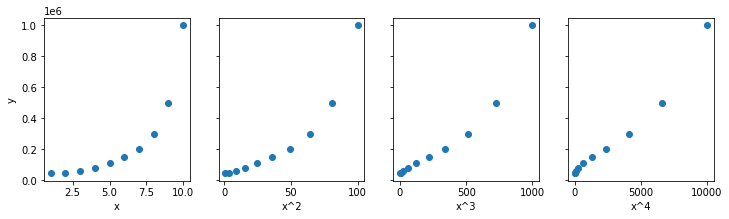

In [ ]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_test[:,i],y)
    ax[i].set_xlabel(x_test_features[i])
ax[0].set_ylabel("y")
plt.show()

the $x^4$ feature mapped against the target value $y$ is the most linear. Linear regression can then easily generate a model using that feature.

### Implementing Gradient descent for Linear Regresion



In [54]:
# Loop version of multi-variable compute_cost
def compute_cost(X, y, w, b): 
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i],w) + b       
        cost = cost + (f_wb_i - y[i])**2              
    cost = cost/(2*m)                                 
    return(np.squeeze(cost)) 

def compute_gradient_matrix(X, y, w, b):
    m,n = X.shape
    f_wb = X @ w + b
    e   = f_wb - y
    dj_dw  = (1/m) * (X.T @ e)
    dj_db  = (1/m) * np.sum(e)
    return dj_db,dj_dw


def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    # number of training examples
    m = len(X)
    
    # An array to store values at each iteration primarily for graphing later
    hist={}
    hist["cost"] = []; hist["params"] = []; hist["grads"]=[]; hist["iter"]=[];
    
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    save_interval = np.ceil(num_iters/10000) # prevent resource exhaustion for long runs

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J,w,b at each save interval for graphing
        if i == 0 or i % save_interval == 0:     
            hist["cost"].append(cost_function(X, y, w, b))
            hist["params"].append([w,b])
            hist["grads"].append([dj_dw,dj_db])
            hist["iter"].append(i)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            #print(f"Iteration {i:4d}: Cost {cost_function(X, y, w, b):8.2f}   ")
            cst = cost_function(X, y, w, b)
            print(f"Iteration {i:9d}, Cost: {cst:0.5e}")
    return w, b, hist #return w,b and history for graphing

def run_gradient_descent_feng(X,y,iterations=1000, alpha = 1e-6):
    m,n = X.shape
    # initialize parameters
    initial_w = np.zeros(n)
    initial_b = 0
    # run gradient descent
    w_out, b_out, hist_out = gradient_descent(X ,y, initial_w, initial_b,
                                               compute_cost, compute_gradient_matrix, alpha, iterations)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.4f}")
    
    return(w_out, b_out)

### Scaling features

In [31]:
# implementing Z-Score Normalization
def zscore_normalize_features(X,rtn_ms=False):
    mu     = np.mean(X,axis=0)  
    sigma  = np.std(X,axis=0)
    X_norm = (X - mu)/sigma      

    if rtn_ms:
        return(X_norm, mu, sigma)
    else:
        return(X_norm)
    

In [59]:
# add mean_normalization 
X = zscore_normalize_features(x_test)     

### Fitting the model and visualization

Iteration         0, Cost: 4.35982e+10
Iteration    100000, Cost: 3.70578e+08
Iteration    200000, Cost: 2.90983e+08
Iteration    300000, Cost: 2.35258e+08
Iteration    400000, Cost: 1.96246e+08
Iteration    500000, Cost: 1.68933e+08
Iteration    600000, Cost: 1.49811e+08
Iteration    700000, Cost: 1.36424e+08
Iteration    800000, Cost: 1.27051e+08
Iteration    900000, Cost: 1.20490e+08
w,b found by gradient descent: w: [ -455055.86667652  2462775.47121938 -4219865.08595998  2500835.74220843], b: 249500.0000


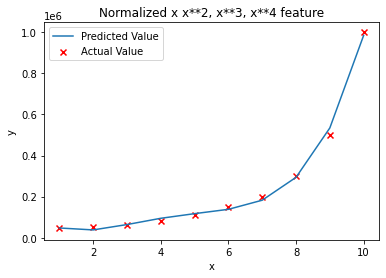

In [58]:
model_w, model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3, x**4 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); 
plt.xlabel("x"); 
plt.ylabel("y"); 
plt.legend(); plt.show()